In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [3]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [4]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [5]:
data.corr()

,f1,f2,f3,y
f1,1.000000,0.065468,0.123589,0.067172
f2,0.065468,1.000000,-0.055561,-0.017944
f3,0.123589,-0.055561,1.000000,0.839060
y,0.067172,-0.017944,0.839060,1.000000


In [6]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [7]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [8]:
X[:5]

array([[-1.95871045e+02, -1.48430842e+04,  5.53214037e+00],
       [-1.21718396e+03, -4.06812462e+03,  4.41608172e+00],
       [ 9.13845086e+00,  4.41341203e+03,  4.25316683e-01],
       [ 3.63824242e+02,  1.54747606e+04,  1.09411900e+00],
       [-7.68812047e+02, -7.96393219e+03,  1.87053629e+00]])

# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance


</pre>

In [9]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log')
model.fit(X,Y)
model.coef_

array([[ 4648.09927301, 10384.93973124, 10190.00578213]])

In [10]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='hinge')
model.fit(X,Y)
model.coef_

array([[ 5068.30489517, -1352.00590247, 10861.19720488]])

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance


In [11]:
from sklearn import preprocessing
X_standard = preprocessing.scale(X)
X_standard[:5]

array([[-4.23126269e-01, -1.55560236e+00,  1.81651062e-01],
       [-2.52039425e+00, -5.17289849e-01, -2.00647759e-01],
       [-2.13888724e-03,  3.00020471e-01, -1.56765904e+00],
       [ 7.26209046e-01,  1.36593043e+00, -1.33856504e+00],
       [-1.59966168e+00, -8.92703393e-01, -1.07260822e+00]])

In [12]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log')
model.fit(X_standard,Y)
model.coef_

array([[ 2.09897038, -1.18751413, 11.58332725]])

In [13]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='hinge')
model.fit(X_standard,Y)
model.coef_

array([[-2.7263424 ,  0.06513138, 13.6579487 ]])

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

In [14]:
import matplotlib.pyplot as plt
plt.plot(X[:,0])
plt.show()
plt.plot(X[:,1])
plt.show()
plt.plot(X[:,2])
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

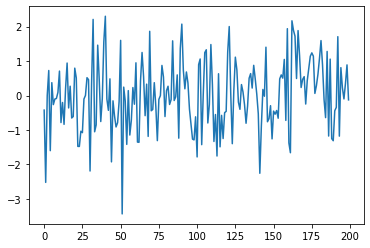

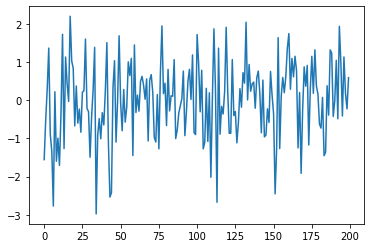

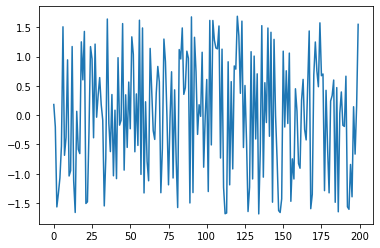

In [15]:
import matplotlib.pyplot as plt
plt.plot(X_standard[:,0])
plt.show()
plt.plot(X_standard[:,1])
plt.show()
plt.plot(X_standard[:,2])
plt.show()

1. In all cases var(F2)>>var(F1)>>Var(F3) is remaining same even after standadization 
2. As we see the above plots the scale of each feature and the variance in the features, 
   the plot looks similar but the sclae is diifferent ist hard to see the different scale features
3. where as in standadized data, the mean is centoried at zero we can the variance of each feature 
   and how much max, min will the data points lies
4. Main objective of normalization is to change the values of numeric features in the dataset to a feature scale, 
   without distorting differences in the ranges of value, its help a lot to see the variance also 